In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# # 1.  Load the highUtilizationPredictionV2wco.csv data file to Pandas 

In [56]:
df = pd.read_csv('highUtilizationPredictionV2wco.csv')

In [57]:
df.shape

(113024, 68)

In [58]:
df.head()

,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,...,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12,HighUtilizationY2,claimCount
0,B,71,PAT136597,0,0,0,0,0,1,0,...,0,1,4,2,1,3,1,1,1,160
1,A,86,PAT119838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,W,70,PAT11289,1,0,0,0,0,0,0,...,4,2,2,0,6,2,1,0,0,52
3,W,75,PAT178745,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,W,77,PAT50922,0,0,0,0,1,0,0,...,4,3,4,4,4,3,4,4,0,66


# 2. Preprocess the data (select input/output attributes, fill missing values, split into training/testing, etc.)

In [59]:
df.isnull().values.any()

False

NO MISSING VALUES

In [60]:
df.columns

Index(['race', 'age', 'patient_id', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',
       'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',
       'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18',
       'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25',
       'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',
       'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14',
       'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23',
       'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5',
       'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10',
       'drugs_m10-11', 'drugs_m11-12', 'HighUtilizationY2', 'claimCount'],
      dtype='object')

In [61]:
features = list(df.columns)

In [62]:
y = df['HighUtilizationY2']

In [63]:
features.remove('HighUtilizationY2')

In [64]:
features.remove('race')

In [65]:
features.remove('claimCount')

In [66]:
features.remove('patient_id')

In [67]:
x = df[features]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 3. Create logistic regression model on training data

In [69]:
clf = LogisticRegression()

In [70]:
clf.fit(X_train,y_train)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
clf.coef_

array([[-5.57599960e-02,  1.84531508e-01,  3.49024459e-02,
         4.99187992e-01, -1.84476511e-01,  1.26512310e-01,
         8.28355175e-01,  3.69737680e-03,  6.46598530e-02,
         1.88833009e-01,  3.02022219e-01, -1.93976375e-01,
         8.07170828e-02,  3.40147822e-01,  6.67947812e-01,
         1.41293198e-02,  2.46628423e-01, -1.67933561e-02,
        -2.15113006e-02, -5.39792374e-03, -1.04878519e-01,
         4.50123477e-01,  1.99331960e-01, -9.22070779e-03,
        -1.61540160e-01,  1.62390567e-01, -2.13418888e-01,
         3.11422920e-01,  3.01675836e-02,  1.54632877e-01,
         1.93165846e-01, -1.09277280e-01, -7.88386120e-04,
         1.05122376e-02,  2.29558078e-01,  1.24913993e-01,
        -2.76748819e-03,  2.35274862e-03, -7.68886092e-04,
         3.46694935e-01,  3.45418763e-01,  2.30139586e-02,
        -3.97644217e-03, -3.77191668e-04,  1.45123584e-02,
         2.06756195e-01,  1.84580672e-01, -4.61785071e-05,
         8.10334781e-03,  3.74845274e-01,  4.92805120e-0

In [72]:
probs = clf.predict_proba(X_test)[:,1]

In [73]:
fpr, tpr, thresholds = roc_curve(y_test,probs)

In [74]:
auc(fpr,tpr)

0.8088890634464574

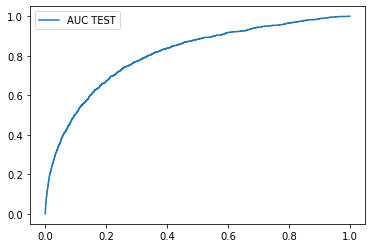

In [75]:
plt.plot(fpr,tpr)
plt.legend(['AUC TEST'])

# 4. Compare AUC of the model applied to training data and testing data

In [76]:
probs_train = clf.predict_proba(X_train)[:,1]

In [77]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,probs_train)

In [78]:
auc(fpr_train,tpr_train)

0.8084135280667636

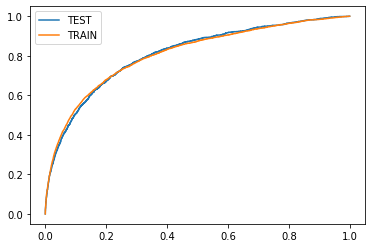

In [79]:
plt.plot(fpr,tpr)
plt.plot(fpr_train, tpr_train)
plt.legend(['TEST','TRAIN'])

# Running RandomForest

In [80]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [81]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [82]:
rf_probs = rf.predict_proba(X_test)[:,1]

In [83]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)

In [84]:
auc(rf_fpr, rf_tpr)

0.7996320092511913

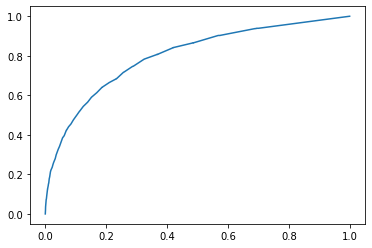

In [85]:
plt.plot(rf_fpr,rf_tpr)

# AUC on train data

In [86]:
rf_probs_train = rf.predict_proba(X_train)[:,1]

In [87]:
rf_fpr_train, rf_tpr_trin, rf_thresholds = roc_curve(y_train, rf_probs_train)

In [88]:
auc(rf_fpr_train, rf_tpr_trin)

0.9988888102370848

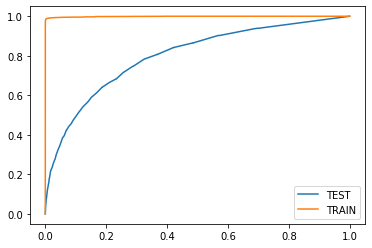

In [89]:
plt.plot(rf_fpr,rf_tpr)
plt.plot(rf_fpr_train, rf_tpr_trin)
plt.legend(['TEST','TRAIN'])

# COMPARING LOGOSTIC AND RANDOM FOREST 

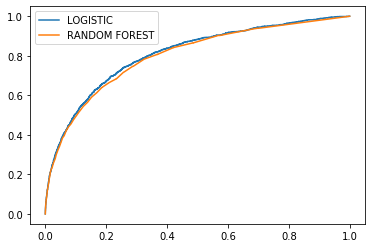

In [90]:
plt.plot(fpr,tpr)
plt.plot(rf_fpr,rf_tpr)
plt.legend(['LOGISTIC','RANDOM FOREST'])